In [7]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:12<00:00, 121MB/s]
100% 1.06G/1.06G [00:12<00:00, 90.1MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
def process(image , label):
  image = tf.cast(image/255,tf.float32)
  return image , label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [30]:
model = Sequential()

model.add(Conv2D(32 , kernel_size=(3,3) , padding = 'valid' , activation = 'relu' , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(64 , kernel_size=(3,3) , padding = 'valid' , activation = 'relu'  ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3) , padding = 'valid' , activation = 'relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2 , padding = 'valid'))

model.add(Flatten())

model.add(Dense(124,activation='relu' ))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu' ))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid' ))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [31]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
history = model.fit(train_ds , epochs = 10 , validation_data = validation_ds )

Epoch 1/10
313/313 [==============================] - 69s 204ms/step - loss: 1.6361 - accuracy: 0.5391 - val_loss: 0.7860 - val_accuracy: 0.5196
Epoch 2/10
313/313 [==============================] - 65s 205ms/step - loss: 0.6960 - accuracy: 0.5573 - val_loss: 0.6549 - val_accuracy: 0.6244
Epoch 3/10
313/313 [==============================] - 64s 202ms/step - loss: 0.6630 - accuracy: 0.5737 - val_loss: 0.6549 - val_accuracy: 0.5610
Epoch 4/10
313/313 [==============================] - 65s 204ms/step - loss: 0.6367 - accuracy: 0.6215 - val_loss: 0.6113 - val_accuracy: 0.7026
Epoch 5/10
313/313 [==============================] - 64s 201ms/step - loss: 0.5816 - accuracy: 0.6833 - val_loss: 0.5356 - val_accuracy: 0.7264
Epoch 6/10
313/313 [==============================] - 65s 206ms/step - loss: 0.5232 - accuracy: 0.7336 - val_loss: 0.4804 - val_accuracy: 0.7652
Epoch 7/10
313/313 [==============================] - 63s 198ms/step - loss: 0.4855 - accuracy: 0.7642 - val_loss: 0.6124 - val_ac

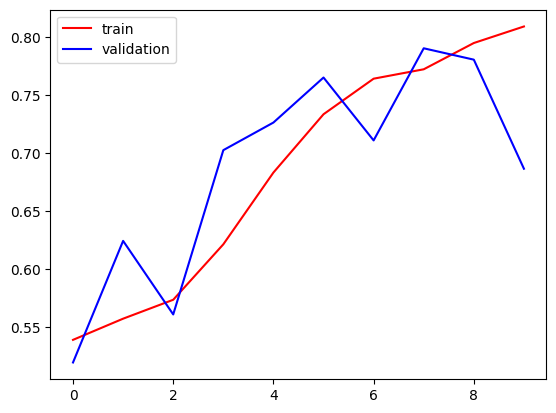

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] , color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'] , color = 'blue' , label = 'validation')
plt.legend()
plt.show()

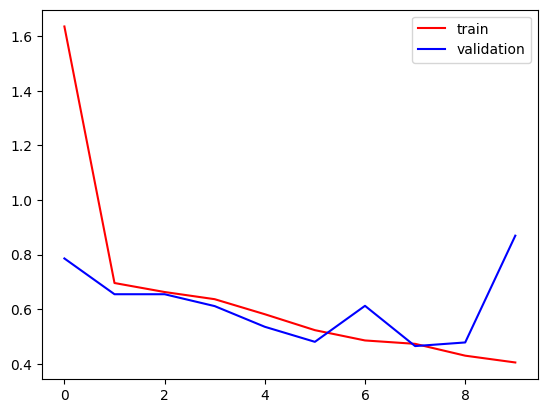

In [33]:
plt.plot(history.history['loss'] , color = 'red' , label = 'train')
plt.plot(history.history['val_loss'] , color = 'blue' , label = 'validation')
plt.legend()
plt.show()

In [34]:
import cv2

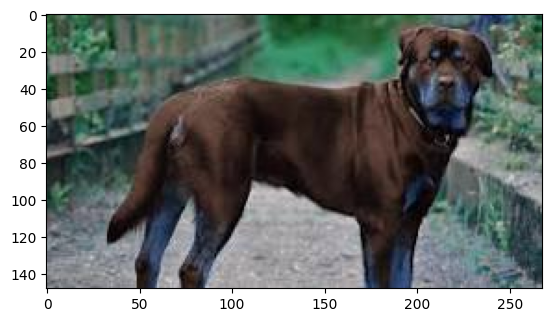

In [51]:
test_img = cv2.imread('/content/dog.jpeg')
plt.imshow(test_img)

In [52]:
test_img.shape

(148, 268, 3)

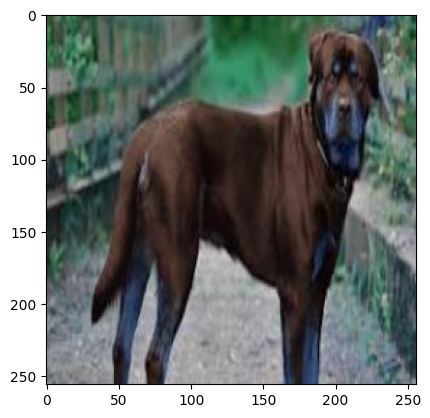

In [53]:
test_img = cv2.resize(test_img,(256,256))
plt.imshow(test_img)

In [54]:
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)